# ACBD6 and NEDPM Syndrome

[Neurodevelopmental Disorder with Progressive Movement Abnormalities (NEDPM)](https://www.omim.org/entry/620785) is an autosomal recessive complex neurologic disorder characterized by global developmental delay apparent from infancy, moderately to severely impaired intellectual development, poor or absent speech, behavioral abnormalities, and various hyperkinetic movement disorders, including dystonia, spasticity, and cerebellar ataxia, that interfere with gait and cause a stooped posture. NEDPM is caused by pathogenic variants in the [ACBD6](https://www.omim.org/entry/616352?search=acbd6&highlight=acbd6) gene.

[Kaiyrzhanov et al. (2024)](https://pubmed.ncbi.nlm.nih.gov/37951597/) did not identify significant genotype-phenotype correlations.

In [1]:
import gpsea
import hpotk

store = hpotk.configure_ontology_store()
hpo = store.load_minimal_hpo(release='v2023-10-09')
print(f'Loaded HPO v{hpo.version}')
print(f"Using gpsea version {gpsea.__version__}")

Loaded HPO v2023-10-09
Using gpsea version 0.7.1


## Loading Phenopackets & Gene Variant Data

In [2]:
from ppktstore.registry import configure_phenopacket_registry
from gpsea.preprocessing import configure_caching_cohort_creator, load_phenopackets

cohort_name = 'ACBD6'
phenopacket_store_release = '0.1.21'


registry = configure_phenopacket_registry()
with registry.open_phenopacket_store(phenopacket_store_release) as ps:
    phenopackets = tuple(ps.iter_cohort_phenopackets(cohort_name))

cohort_creator = configure_caching_cohort_creator(hpo)
cohort, validation = load_phenopackets(
    phenopackets=phenopackets, 
    cohort_creator=cohort_creator,
)

validation.summarize()

Individuals Processed: 100%|██████████| 45/45 [00:00<00:00, 81.01individuals/s]
Validated under permissive policy
No errors or warnings were found


## ACBD6
We user the [Matched Annotation from NCBI and EMBL-EBI (MANE)](https://www.ncbi.nlm.nih.gov/refseq/MANE/) transcript and the corresponding protein identifier for ACBD6.

In [3]:
gene_symbol = 'ACBD6'
mane_tx_id = 'NM_032360.4'
mane_protein_id = "NP_115736.1"

In [4]:
from gpsea.view import CohortViewer

cv = CohortViewer(hpo)
cv.process(cohort, transcript_id=mane_tx_id)

HPO Term,ID,Seen in n individuals
Global developmental delay,HP:0001263,45
Delayed speech and language development,HP:0000750,36
Ataxia,HP:0001251,33
Delayed ability to walk,HP:0031936,32
Stooped posture,HP:0025403,29
Lower limb spasticity,HP:0002061,27
Depressed nasal bridge,HP:0005280,24
Wide nose,HP:0000445,24
Thin upper lip vermilion,HP:0000219,23
Coarse facial features,HP:0000280,22


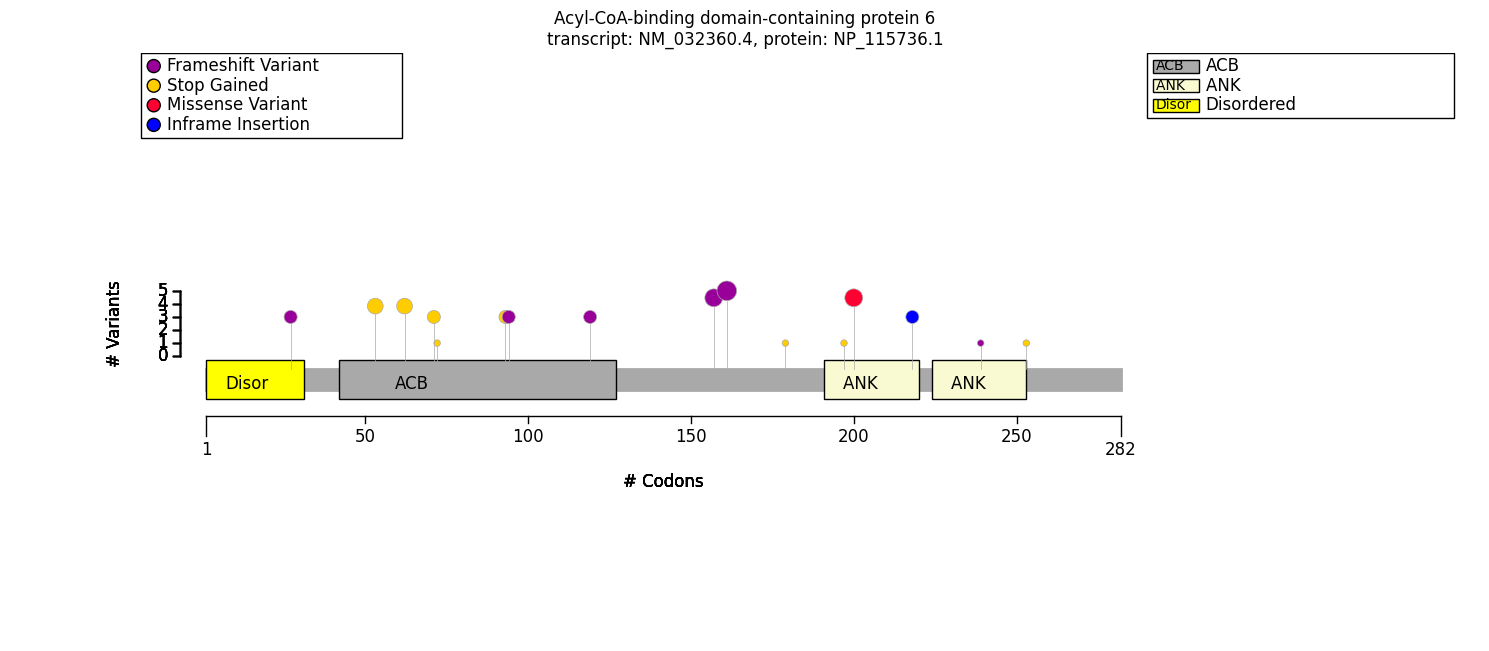

In [5]:
from gpsea.model.genome import GRCh38
from gpsea.preprocessing import configure_default_protein_metadata_service, VVMultiCoordinateService
txc_service = VVMultiCoordinateService(genome_build=GRCh38)
pms = configure_default_protein_metadata_service()
tx_coordinates = txc_service.fetch(mane_tx_id)
protein_meta = pms.annotate(mane_protein_id)
from gpsea.view import ProteinVisualizer
import matplotlib.pyplot as plt
abdc6_fig, ax = plt.subplots(figsize=(15, 8))
visualizer = ProteinVisualizer()
visualizer.draw_protein_diagram(
    tx_coordinates,
    protein_meta,
    cohort,
    ax=ax,
)
abdc6_fig.tight_layout()

In [6]:
from gpsea.view import ProteinVariantViewer
viewer = ProteinVariantViewer(protein_meta, mane_tx_id)
viewer.process(cohort)

Name,Type,Coordinates,Count,Variants
Disordered,REGION,1 - 31,2,p.Val28GlyfsTer6
ACB,DOMAIN,42 - 127,15,p.Tyr72Ter; p.Glu63Ter; p.Leu121ThrfsTer27; p.Gln54Ter; p.Lys95AsnfsTer23; p.Gln94Ter; p.Lys73Ter
ANK 1,REPEAT,191 - 220,7,p.Asp201Gly; p.Asn219dup; p.Trp198Ter
ANK 2,REPEAT,224 - 253,1,p.Ile240ArgfsTer9


## Correlation Analysis

In [7]:
from gpsea.analysis.pcats import configure_hpo_term_analysis
from gpsea.analysis.predicate.phenotype import prepare_predicates_for_terms_of_interest

analysis = configure_hpo_term_analysis(hpo)
pheno_predicates = prepare_predicates_for_terms_of_interest(
    cohort=cohort,
    hpo=hpo,
)

In [8]:
from gpsea.model import VariantEffect
from gpsea.analysis.predicate.genotype import biallelic_predicate


from gpsea.analysis.predicate.genotype import VariantPredicates

is_missense = VariantPredicates.variant_effect(VariantEffect.MISSENSE_VARIANT, tx_id=mane_tx_id)
partitions = ({0,1}, {2,})
missense = biallelic_predicate(a_predicate=is_missense, 
                                   b_predicate=~is_missense, 
                                   a_label="missense",
                                   b_label="other",
                                   partitions=partitions)

missense_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_predicate=missense,
    pheno_predicates=pheno_predicates,
)
from gpsea.view import MtcStatsViewer

viewer = MtcStatsViewer()
viewer.process(missense_result)

Code,Reason,Count
HMF01,Skipping term with maximum frequency that was less than threshold 0.4,47
HMF03,Skipping term because of a child term with the same individual counts,9
HMF08,Skipping general term,66
HMF09,Skipping term with maximum annotation frequency that was less than threshold 0.4,101


In [9]:
from gpsea.view import summarize_hpo_analysis

summarize_hpo_analysis(hpo=hpo, result=missense_result)

Allele group                                       missense/missense OR missense/other  \
                                                                                 Count   
Self-injurious behavior [HP:0100716]                                               3/4   
Partial agenesis of the corpus callosum [HP:000...                                 2/4   
Deeply set eye [HP:0000490]                                                        4/4   
Urinary incontinence [HP:0000020]                                                  4/4   
Frequent temper tantrums [HP:0025161]                                              4/4   
Upslanted palpebral fissure [HP:0000582]                                           4/4   
Upper limb spasticity [HP:0006986]                                                 2/2   
Tremor [HP:0001337]                                                                4/4   
Thin upper lip vermilion [HP:0000219]                                              4/4   
Aggressive behavior [HP:0000718]                                                   0/4   
Depressed nasal bridge [HP:0005280]                                                4/4   
Wide nose [HP:0000445]                                                             4/4   
Parkinsonism [HP:0001300]                                                          0/2   
Postural instability [HP:0002172]                                                  2/2   
Tics [HP:0100033]                                                                  0/2   
Lower limb spasticity [HP:0002061]                                                 4/4   
Global developmental delay [HP:0001263]                                            4/4   
Neurodevelopmental delay [HP:0012758]                                              4/4   
Delayed speech and language development [HP:000...                                 4/4   
Abnormal communication [HP:0034434]                                                4/4   
Delayed ability to walk [HP:0031936]                                               4/4   
Delayed gross motor development [HP:0002194]                                       4/4   
Coarse facial features [HP:0000280]                                                2/4   
Abnormal facial shape [HP:0001999]                                                 2/2   
Abnormal nasal bridge morphology [HP:0000422]                                      4/4   
Abnormal nasal morphology [HP:0005105]                                             4/4   
Abnormality of the nose [HP:0000366]                                               4/4   
Everted lower lip vermilion [HP:0000232]                                           2/4   
Abnormal lip morphology [HP:0000159]                                               4/4   
Abnormal oral cavity morphology [HP:0000163]                                       4/4   
Ataxia [HP:0001251]                                                                2/2   
Abnormality of coordination [HP:0011443]                                           2/2   
Involuntary movements [HP:0004305]                                                 4/4   
Spasticity [HP:0001257]                                                            4/4   
Upper motor neuron dysfunction [HP:0002493]                                        4/4   
Hypertonia [HP:0001276]                                                            4/4   
Abnormal muscle tone [HP:0003808]                                                  4/4   
Abnormal brain morphology [HP:0012443]                                             4/4   
Morphological central nervous system abnormalit...                                 4/4   
Autistic behavior [HP:0000729]                                                     2/4   
Atypical behavior [HP:0000708]                                                     4/4   
Recurrent maladaptive behavior [HP:5200241]                                        4/4   
Abnormal temper tantrums [HP:0025160]   

In [10]:
acb = VariantPredicates.protein_feature(feature_id="ACB", protein_metadata=protein_meta)


partitions = ({0,1}, {2,})
gt_predicate = biallelic_predicate(a_predicate=acb, b_predicate=~acb, partitions=partitions, 
                                   a_label="ACB",
                                   b_label="other")
acb_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_predicate=gt_predicate,
    pheno_predicates=pheno_predicates,
)
summarize_hpo_analysis(hpo=hpo, result=acb_result)

Allele group                                       ACB/ACB OR ACB/other  \
                                                                  Count   
Depressed nasal bridge [HP:0005280]                                 9/9   
Wide nose [HP:0000445]                                              9/9   
Autistic behavior [HP:0000729]                                      7/9   
Thin upper lip vermilion [HP:0000219]                               2/7   
Parkinsonism [HP:0001300]                                           1/8   
Coarse facial features [HP:0000280]                                 7/8   
Frequent temper tantrums [HP:0025161]                               7/9   
Upslanted palpebral fissure [HP:0000582]                            7/9   
Ataxia [HP:0001251]                                               11/11   
Postural instability [HP:0002172]                                   7/9   
Tremor [HP:0001337]                                                4/10   
Everted lower lip vermilion [HP:0000232]                            5/8   
Tics [HP:0100033]                                                   2/3   
Appendicular spasticity [HP:0034353]                                9/9   
Spasticity [HP:0001257]                                             9/9   
Upgaze palsy [HP:0025331]                                           3/5   
Upper limb spasticity [HP:0006986]                                  4/9   
Deeply set eye [HP:0000490]                                         3/8   
Lower limb spasticity [HP:0002061]                                 9/11   
Aggressive behavior [HP:0000718]                                    4/9   
Global developmental delay [HP:0001263]                           15/15   
Neurodevelopmental delay [HP:0012758]                             15/15   
Delayed speech and language development [HP:000...                11/11   
Abnormal communication [HP:0034434]                               11/11   
Delayed ability to walk [HP:0031936]                                9/9   
Delayed gross motor development [HP:0002194]                        9/9   
Abnormal facial shape [HP:0001999]                                  7/7   
Abnormal nasal bridge morphology [HP:0000422]                       9/9   
Abnormal nasal morphology [HP:0005105]                              9/9   
Abnormality of the nose [HP:0000366]                                9/9   
Abnormal lip morphology [HP:0000159]                                5/5   
Abnormal oral cavity morphology [HP:0000163]                        5/5   
Abnormality of coordination [HP:0011443]                          11/11   
Involuntary movements [HP:0004305]                                  4/4   
Upper motor neuron dysfunction [HP:0002493]                         9/9   
Hypertonia [HP:0001276]                                             9/9   
Abnormal muscle tone [HP:0003808]                                   9/9   
Abnormal brain morphology [HP:0012443]                              4/4   
Morphological central nervous system abnormalit...                  4/4   
Atypical behavior [HP:0000708]                                    11/11   
Recurrent maladaptive behavior [HP:5200241]                         9/9   
Abnormal temper tantrums [HP:0025160]                               7/7   
Abnormality of upper lip vermillion [HP:0011339]                    2/2   
Abnormal upper lip morphology [HP:0000177]                          2/2   
Thin vermilion border [HP:0000233]                                  2/2   
Slanting of the palpebral fissure [HP:0200006]                      7/7   
Abnormal eyelid morphology [HP:0000492]                             7/7   
Abnormal ocular adnexa morphology [HP:0030669]                      7/7   
Stooped posture [HP:0025403]                                        9/9   
Urinary incontinence [HP:0000020]                                   3/5   

Allele group                                               other/other  \
                         

In [11]:
from gpsea.analysis.predicate.genotype import sex_predicate
mf_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_predicate=sex_predicate(),
    pheno_predicates=pheno_predicates,
)

summarize_hpo_analysis(hpo, mf_result)

Sex                                                FEMALE           MALE  \
                                                    Count Percent  Count   
Aggressive behavior [HP:0000718]                     3/16     19%  11/21   
Lower limb spasticity [HP:0002061]                  10/17     59%  17/20   
Upslanted palpebral fissure [HP:0000582]            11/16     69%   9/21   
Tics [HP:0100033]                                     1/6     17%   6/13   
Coarse facial features [HP:0000280]                  8/16     50%  14/21   
Parkinsonism [HP:0001300]                            4/13     31%   7/13   
Stooped posture [HP:0025403]                        13/14     93%  16/16   
Depressed nasal bridge [HP:0005280]                 12/16     75%  12/20   
Wide nose [HP:0000445]                              12/16     75%  12/20   
Delayed ability to walk [HP:0031936]                17/17    100%  15/16   
Tremor [HP:0001337]                                  9/17     53%  13/20   
Spasticity [HP:0001257]                             11/13     85%  20/21   
Appendicular spasticity [HP:0034353]                10/12     83%  17/18   
Upgaze palsy [HP:0025331]                            4/11     36%   8/16   
Deeply set eye [HP:0000490]                          6/14     43%  10/19   
Thin upper lip vermilion [HP:0000219]               11/16     69%  12/20   
Frequent temper tantrums [HP:0025161]                9/16     56%  10/20   
Global developmental delay [HP:0001263]             22/22    100%  23/23   
Neurodevelopmental delay [HP:0012758]               22/22    100%  23/23   
Delayed speech and language development [HP:000...  19/19    100%  22/22   
Abnormal communication [HP:0034434]                 19/19    100%  22/22   
Delayed gross motor development [HP:0002194]        17/17    100%  15/15   
Abnormal facial shape [HP:0001999]                    8/8    100%  14/14   
Abnormal nasal bridge morphology [HP:0000422]       12/12    100%  12/12   
Abnormal nasal morphology [HP:0005105]              12/12    100%  12/12   
Abnormality of the nose [HP:0000366]                13/13    100%  12/12   
Everted lower lip vermilion [HP:0000232]             7/15     47%   9/20   
Abnormal lip morphology [HP:0000159]                13/13    100%  14/14   
Abnormal oral cavity morphology [HP:0000163]        13/13    100%  14/14   
Ataxia [HP:0001251]                                 14/16     88%  19/23   
Abnormality of coordination [HP:0011443]            14/14    100%  19/19   
Involuntary movements [HP:0004305]                    9/9    100%  13/13   
Upper motor neuron dysfunction [HP:0002493]         11/11    100%  20/20   
Hypertonia [HP:0001276]                             11/11    100%  20/20   
Abnormal muscle tone [HP:0003808]                   11/11    100%  20/20   
Abnormal brain morphology [HP:0012443]              11/11    100%    8/8   
Morphological central nervous system abnormalit...  11/11    100%    8/8   
Autistic behavior [HP:0000729]                       6/13     46%   7/14   
Atypical behavior [HP:0000708]                      12/12    100%  17/17   
Recurrent maladaptive behavior [HP:5200241]         10/10    100%  17/17   
Abnormal temper tantrums [HP:0025160]                 9/9    100%  10/10   
Abnormality of upper lip vermillion [HP:0011339]    11/11    100%  12/12   
Abnormal upper lip morphology [HP:0000177]          11/11    100%  12/12   
Thin vermilion border [HP:0000233]                  11/11    100%  12/12   
Slanting of the palpebral fissure [HP:0200006]      11/11    100%    9/9   
Abnormal eyelid morphology [HP:0000492]             11/11    100%  11/11   
Abnormal ocular adnexa morphology [HP:0030669]      11/11    100%  11/11   
Postural instability [HP:0002172]                    6/10     60%   9/15   
Urinary incontinence [HP:0000020]                    7/12     58%   6/11   

Sex                                                                            \
                                          

In [12]:
from gpseacs.report import GpseaAnalysisReport, GPAnalysisResultSummary


mono_results = (
    GPAnalysisResultSummary.from_multi(
         result=missense_result,
    ),
    GPAnalysisResultSummary.from_multi(
        result = acb_result,
    ),
    GPAnalysisResultSummary.from_multi(
        result = mf_result,
    ),
)

acbd6_caption = "No statistically significant results identified."
report = GpseaAnalysisReport(name=gene_symbol, 
                             cohort=cohort, 
                             fet_results=mono_results,
                             gene_symbol=gene_symbol,
                             mane_tx_id=mane_tx_id,
                             mane_protein_id=mane_protein_id,
                             caption=acbd6_caption)

In [13]:
from gpseacs.report import GpseaNotebookSummarizer
summarizer = GpseaNotebookSummarizer(hpo=hpo, gpsea_version=gpsea.__version__)
summarizer.summarize_report(report=report)

Genotype (A),Genotype (B),Tests performed,Significant tests
missense/missense OR missense/other,other/other,52,0
Genotype (A),Genotype (B),Tests performed,Significant tests
ACB/ACB OR ACB/other,other/other,50,0
Genotype (A),Genotype (B),Tests performed,Significant tests
FEMALE,MALE,49,0


In [14]:
summarizer.process_latex(report=report,protein_fig=abdc6_fig)

Figure saved to ../../supplement/img/ACBD6_protein_diagram-draft.pdf
Output to ../../supplement/tex/ACBD6_summary_draft.tex
